In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


In [2]:
train=pd.read_csv('train.csv')
test =pd.read_csv('test.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


891

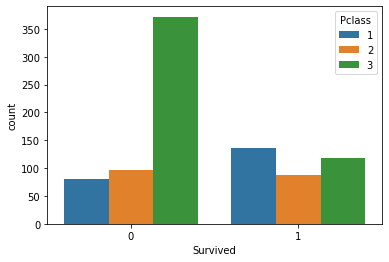

In [5]:
sns.countplot(x='Survived', data=train, hue='Pclass')
train['Survived'].count()

C:\Users\mi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

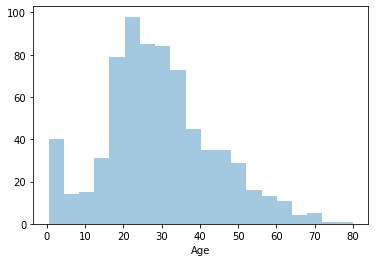

In [6]:
sns.distplot(train['Age'],kde=False)

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see above the Age and Cabin sections have not complete information. Well, we can deal with Age, because there are small numbers of NaNs, but we have to drope Cabin, because most of it is empty. It is not useful for us. even if we try to fill it using different manipulations it will only distort our prediction result. I addion we have to also drop names and ticket columns because they are almost irrelevant, because every one has probabily unique name and ticket.  

In [8]:
train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)
train=train.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Lets Check the Embarked unique values. for example for sex, it's M or F so what about Embarked? and we have to convert it into integer values.

In [10]:
train['Embarked'].unique() # We have three values, including nan, which we should replace it.we have to clear our data.

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

As we can see only Age and Embarked have NaN values, so we have to replace them with something that we can work with.

In [13]:
train['Age'].fillna(train['Age'].median(), inplace = True)
train['Embarked'].fillna('U', inplace=True)

In [14]:
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Embarked'].fillna('U', inplace=True)
test['Fare'].fillna(test['Fare'].mean() , inplace=True)

In [15]:
train['Embarked'].unique()

array(['S', 'C', 'Q', 'U'], dtype=object)

In [16]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [17]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
targetCol=['Sex','Embarked']

for column in targetCol:
    train[column]=le.fit_transform(train[column])
    test[column]=le.transform(test[column])
    print(le.classes_)

['female' 'male']
['C' 'Q' 'S' 'U']


In [18]:
train['Embarked'].unique()

array([2, 0, 1, 3])

In [19]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [20]:
from sklearn.model_selection import train_test_split
y=train['Survived']
X=train.drop('Survived', axis=1)
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
clasfr=LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)

In [22]:
predic=clasfr.predict((X_val))
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predic)

0.8100558659217877

In [23]:
submission=clasfr.predict(test)

In [47]:
accuracy_score(y_val, Y_prediction)

0.8268156424581006

In [50]:
result_df=pd.DataFrame({"PassengerId": test['PassengerId'].values,
                      "Survived": submission})

In [26]:
result_df.to_csv("Result.csv", index=False)

In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_val)

score=random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [48]:
Sub=random_forest.predict(test)

In [51]:
RFresult_df=pd.DataFrame({"PassengerId": test['PassengerId'].values,
                      "Survived": Sub})

In [52]:
RFresult_df.to_csv("RfResult.csv", index=False)

In [34]:
Y_prediction

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)